In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
Q3 = df.trestbps.quantile(0.75)
Q1 = df.trestbps.quantile(0.25)
IQR = Q3 - Q1
IQR

20.0

In [31]:
df = df[~((df.trestbps < Q1 - 1.5*IQR) | (df.trestbps > Q3 + 1.5*IQR))]

In [32]:
Q3 = df.chol.quantile(0.75)
Q1 = df.chol.quantile(0.25)
IQR = Q3 - Q1
IQR

62.75

In [33]:
df = df[~((df.chol < Q1 - 1.5*IQR) | (df.chol > Q3 + 1.5*IQR))]

In [34]:
Q3 = df.thalach.quantile(0.75)
Q1 = df.thalach.quantile(0.25)
IQR = Q3 - Q1
df = df[~((df.thalach < Q1 - 1.5*IQR) | (df.thalach > Q3 + 1.5*IQR))]

In [35]:
Q3 = df.oldpeak.quantile(0.75)
Q1 = df.oldpeak.quantile(0.25)
IQR = Q3 - Q1
df = df[~((df.oldpeak < Q1 - 1.5*IQR) | (df.oldpeak > Q3 + 1.5*IQR))]

In [36]:
Q3 = df.ca.quantile(0.75)
Q1 = df.ca.quantile(0.25)
IQR = Q3 - Q1
df = df[~((df.ca < Q1 - 1.5*IQR) | (df.ca > Q3 + 1.5*IQR))]

In [37]:
Q3 = df.thal.quantile(0.75)
Q1 = df.thal.quantile(0.25)
IQR = Q3 - Q1
df = df[~((df.thal < Q1 - 1.5*IQR) | (df.thal > Q3 + 1.5*IQR))]

In [38]:
#to check if any null values exist
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [39]:
#to extract information about mean,std and different percentiles of each column
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,53.777778,0.685824,1.000000,129.478927,242.022989,0.126437,0.532567,150.992337,0.314176,0.955556,1.432950,0.509579,2.298851,0.578544
std,9.044571,0.465079,1.037749,15.448567,44.402957,0.332979,0.515055,22.562220,0.465079,1.038609,0.607886,0.721180,0.577427,0.494741
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


In [40]:
#to extract information about datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 302
Data columns (total 14 columns):
age         261 non-null int64
sex         261 non-null int64
cp          261 non-null int64
trestbps    261 non-null int64
chol        261 non-null int64
fbs         261 non-null int64
restecg     261 non-null int64
thalach     261 non-null int64
exang       261 non-null int64
oldpeak     261 non-null float64
slope       261 non-null int64
ca          261 non-null int64
thal        261 non-null int64
target      261 non-null int64
dtypes: float64(1), int64(13)
memory usage: 30.6 KB


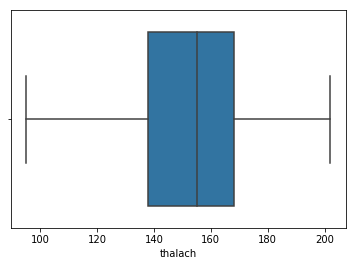

In [41]:
df.loc[df['thalach']<95,'thalach'] = 95

sns.boxplot(df['thalach'])

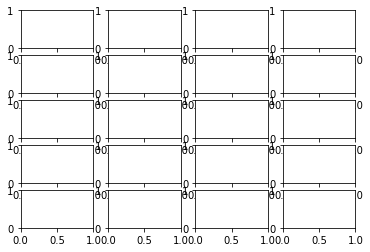

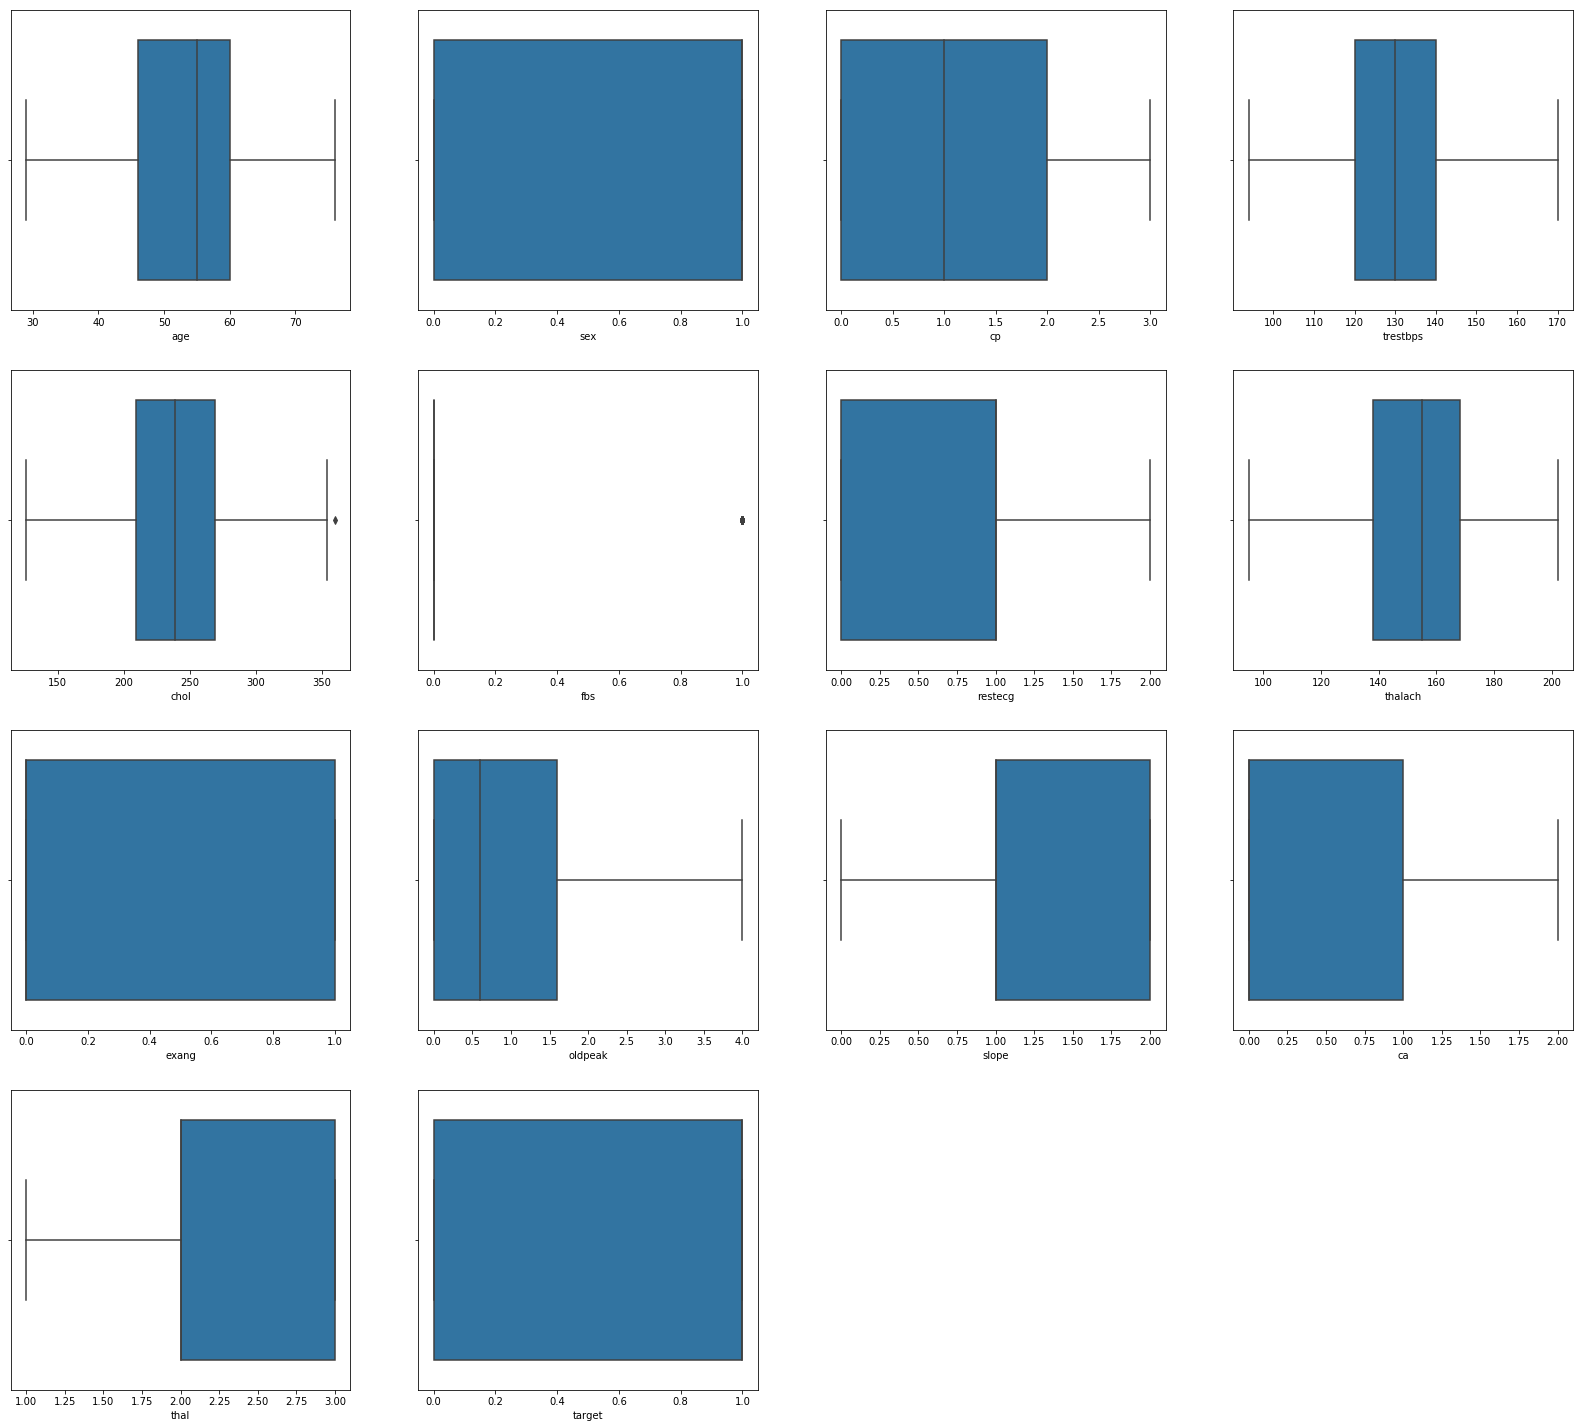

In [42]:
f = plt.subplots(5,4)
i = 0
plt.figure(figsize=(28,32))
for x in df.columns:
    i+=1
    plt.subplot(5,4,i)
    sns.boxplot(df[x])

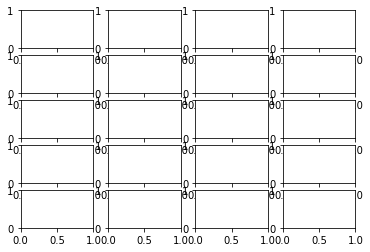

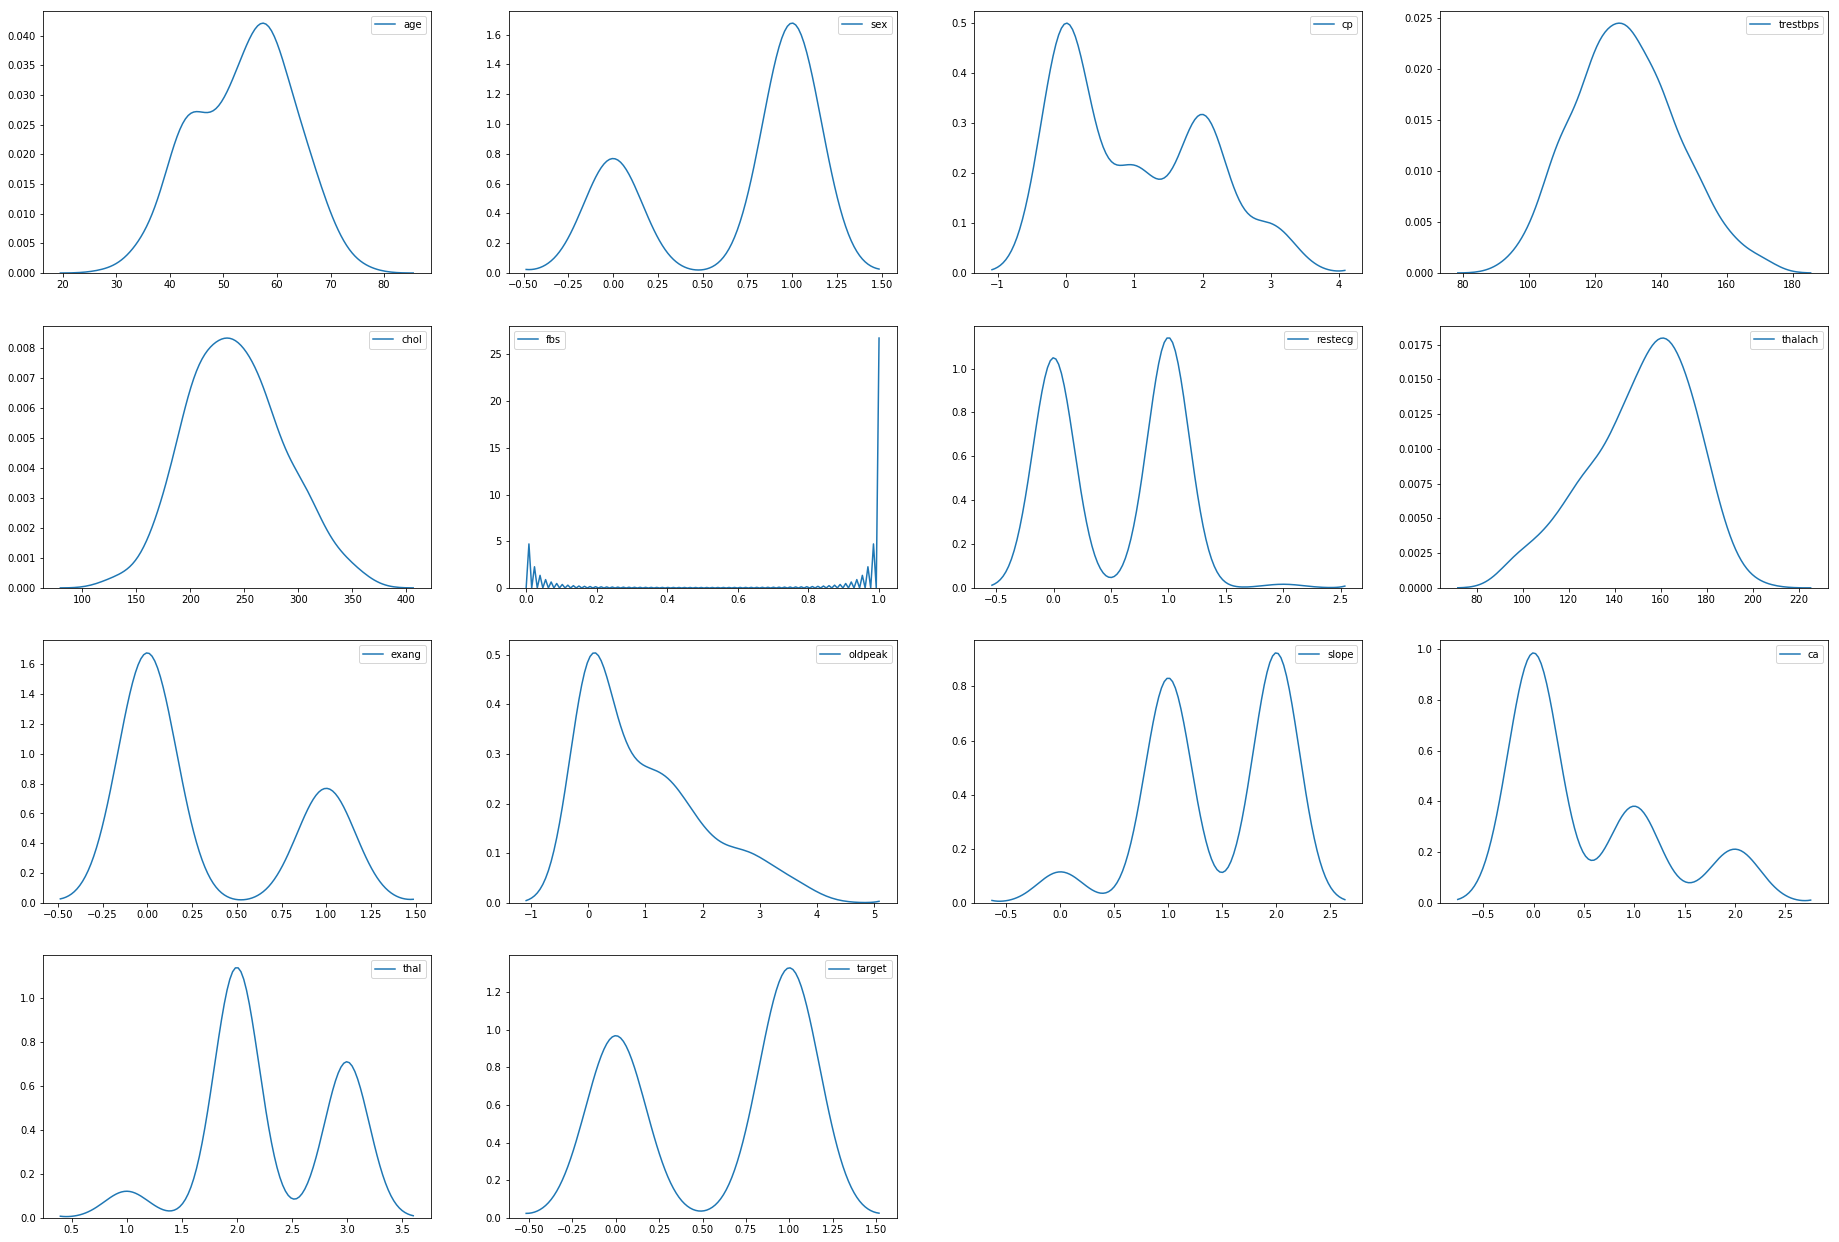

In [43]:
f = plt.subplots(5,4)
i = 0
plt.figure(figsize=(32,28))
for x in df.columns:
    i+=1
    plt.subplot(5,4,i)
    sns.kdeplot(df[x])

In [16]:
df.loc[df['trestbps']>170,'trestbps'] = 170
#sns.boxplot(df['trestbps'])

df.loc[df['chol']>350,'chol'] = 350
#sns.boxplot(df['chol'])

df.loc[df['thalach']<90,'thalach'] = 90
#sns.boxplot(df['thalach'])

df.loc[df['oldpeak']>4,'oldpeak'] =4
#sns.boxplot(df['oldpeak'])

#df['oldpeak'].value_counts()

df.loc[df['ca']>2,'ca'] = 2
#sns.boxplot(df['ca'])

df.loc[df['thal']<2,'thal'] = 2
#sns.boxplot(df['thal'])

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [18]:
sc.fit(df.drop('target',axis=1))
df_sc = sc.transform(df.drop('target',axis=1))
df_sc.shape

C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


(261, 13)

In [113]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',C=100000)

'''X = df_sc
y = df.target'''
X = df.drop('target',axis=1)
y = df.target
print(X.shape,y.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

lr.fit(X_train,y_train)

preds = lr.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred=preds,y_true=y_test)

(261, 13) (261,)
(208, 13) (208,) (53, 13) (53,)


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[19,  4],
       [ 2, 28]], dtype=int64)

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
clf = RandomForestClassifier(n_estimators=50)

clf.fit(X_train,y_train)

preds = clf.predict(X_test)

cnf = confusion_matrix(y_true=y_test,y_pred=preds)
acc = (cnf[0][0]+cnf[1][1])/(cnf[0][0]+cnf[1][1]+cnf[0][1]+cnf[1][0])
cnf

array([[17,  6],
       [ 4, 26]], dtype=int64)

In [116]:
confusion_matrix(y_pred=clf.predict(X_train),y_true=y_train)

array([[ 87,   0],
       [  0, 121]], dtype=int64)

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn.predict(X_test)
    preds = knn.predict(X_test)
    print(confusion_matrix(y_true=y_test,y_pred=preds))

[[ 7 16]
 [ 7 23]]
[[12 11]
 [17 13]]
[[10 13]
 [ 9 21]]
[[10 13]
 [13 17]]
[[ 8 15]
 [10 20]]
[[12 11]
 [12 18]]
[[10 13]
 [ 9 21]]
[[10 13]
 [13 17]]
[[ 8 15]
 [ 9 21]]


In [119]:
from xgboost import XGBClassifier

In [120]:
from sklearn.metrics import accuracy_score
max_i = 0
max_acc = 0
for  i in range(1,10):    
    clf = XGBClassifier(max_depth=i)
    clf.fit(X_train,y_train)
    #print(clf)
    preds = clf.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    if accuracy>max_acc:
        max_i = i
        max_acc = accuracy
    print("Accuracy : %.2f%%" % (accuracy * 100.0))
print("Max accuracy at{0}={1}".format(max_i,max_acc))

Accuracy : 84.91%
Accuracy : 81.13%
Accuracy : 75.47%
Accuracy : 83.02%
Accuracy : 84.91%
Accuracy : 84.91%
Accuracy : 83.02%
Accuracy : 83.02%
Accuracy : 83.02%
Max accuracy at1=0.8490566037735849


In [121]:
clf = XGBClassifier(max_depth=2)
clf.fit(X_train,y_train)
#print(clf)
preds = clf.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Accuracy:",accuracy)
confusion_matrix(y_true=y_test,y_pred=preds)

Accuracy: 0.8113207547169812


array([[16,  7],
       [ 3, 27]], dtype=int64)

In [147]:
from sklearn.svm import SVC
svc = SVC(gamma='scale', kernel='linear',C=1000)

In [148]:
svc.fit(X_train,y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [149]:
preds = svc.predict(X_test)
confusion_matrix(y_test,preds)

array([[18,  5],
       [ 3, 27]], dtype=int64)